# Home task : KNN_synthetic_dataset

#### Generrate synthetic dataset

In [1]:
import operator
import numpy as np
import ML_mst as mst
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib notebook
cmap_bold = ListedColormap(['blue','#FFFF00','black','red'])


X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2

<IPython.core.display.Javascript object>


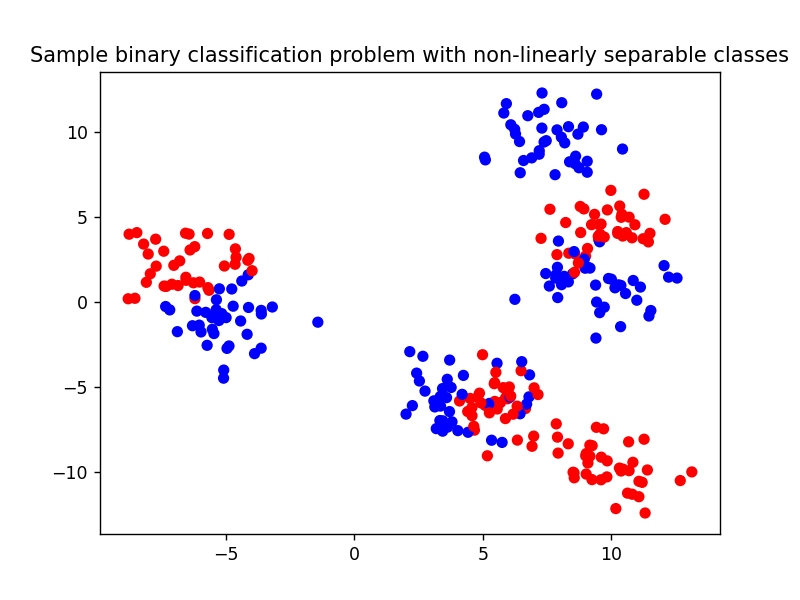

In [2]:
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2, marker= 'o', s=30, cmap=cmap_bold)

#### Split to train and test

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

#### Train KNN regressors for different K

In [4]:
scaler= MinMaxScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
accuracy_k = {}
for i in range(1,40,2):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train_scaled, y_train)
    score = clf.score (X_test_scaled, y_test)

    score = clf.score (X_test_scaled, y_test)
    accuracy_k[i] = score

In [6]:
accuracy_k

{1: 0.9333333333333333,
 3: 0.8933333333333333,
 5: 0.9066666666666666,
 7: 0.9333333333333333,
 9: 0.92,
 11: 0.9066666666666666,
 13: 0.8933333333333333,
 15: 0.8933333333333333,
 17: 0.9333333333333333,
 19: 0.9333333333333333,
 21: 0.9333333333333333,
 23: 0.92,
 25: 0.9466666666666667,
 27: 0.9333333333333333,
 29: 0.92,
 31: 0.92,
 33: 0.92,
 35: 0.9466666666666667,
 37: 0.9066666666666666,
 39: 0.92}

#### Choose the best K determined on test set

In [7]:
best = max(accuracy_k.items(), key=operator.itemgetter(1))
best

(25, 0.9466666666666667)

### Result

In [8]:
k_best = best[0]
score_best = best[1]
print ('The best k = {} , score = {}'.format(k_best,score_best ))

The best k = 25 , score = 0.9466666666666667


## Visualize the decision boundary

#### Example visualization based on the lecture (Shown to compare to my version)

In [9]:
clf = KNeighborsClassifier(n_neighbors = k_best)
clf.fit(X_train_scaled, y_train)
score = clf.score (X_test_scaled, y_test)

Call prediction for all grid values (precision of drawing = 0.01, you may configure to speed up e.g. precision=0.05)


<IPython.core.display.Javascript object>


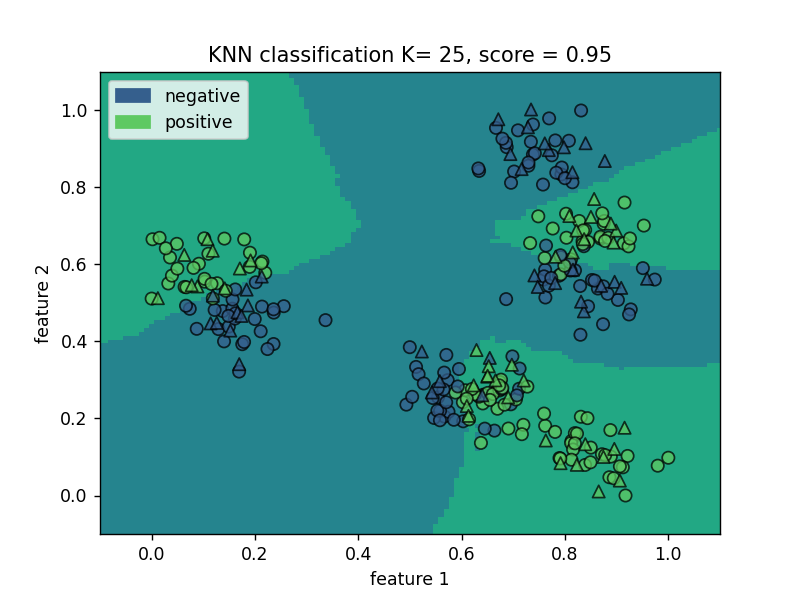

In [10]:
mst.plot_decision_boundary(clf, X_train_scaled, y_train, X_test=X_test_scaled, y_test= y_test,
                               title='KNN classification K= {}, score = {:.2f}'.format(k_best, score), 
                               precision=0.01,plot_symbol_size = 50)

### My version of decision boundary visualization

In [11]:
def plot_decision_boundary(X,y,clf=None):
    
    fig=plt.figure()
    ax = plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y,cmap=cmap_bold,s=50, zorder=3)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.7,
                           levels=np.arange(n_classes + 2) - 0.5,
                           cmap='cubehelix',
                           zorder=1)
    
    plt.title('KNN classification K= {}, score = {:.2f}'.format(k_best, score))
    
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    ax.set(xlim=xlim, ylim=ylim)


<IPython.core.display.Javascript object>


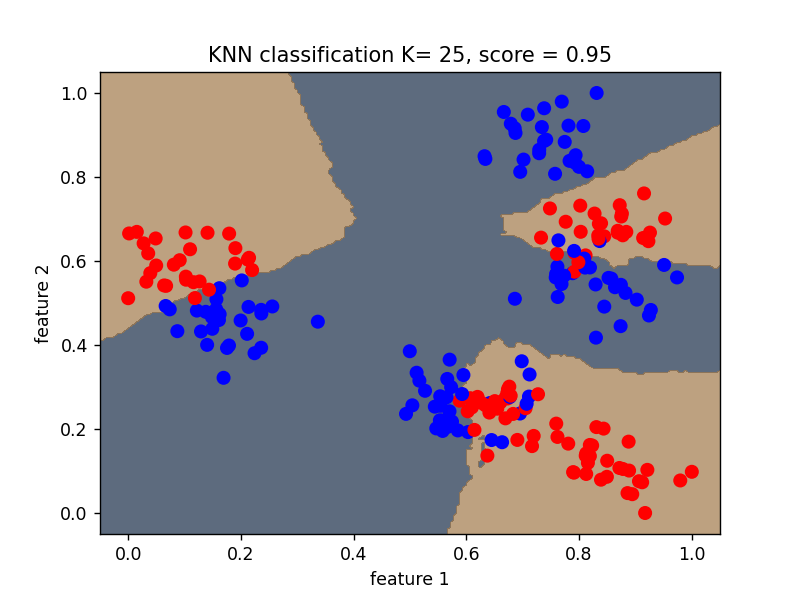

In [12]:
plot_decision_boundary(X_train_scaled, y_train, clf)